In [45]:
# # Modul neu laden, falls Änderungen vorgenommen wurden (sonst auskommentiert lassen)
# import importlib
# import sl_model_functions
# importlib.reload(sl_model_functions)

In [46]:
from sl_model_functions import *

In [47]:
# Physikalisch-chemische Eigenschaften
M_r = 136            # relative Molekülmasse des Migranten [g/mol]
T_C = 20             # Temperatur [°C]
c_P0 = 200           # Anfangskonzentration im Polymer [mg/kg]
Material = "HDPE"   # Material des Polymers [-]
P_density = 0.9045    # Dichte des Polymers [g/cm^3]
F_density = 0.9      # Dichte des Fluids [g/cm^3]
D_P_known = None     # Diffusionskoeffizient des Polymers, falls bekannt [cm^2/s]
K_PF = 1             # Verteilungskoeffizient [-]
t_max = 3600 * 24 * 10   # Simulationszeit [s]

# Geometrische Größen
d_P = 0.2           # Durchmesser des Polymers [cm]
d_F = 2           # Durchmesser des Fluids [cm]
V_P = None           # Volumen des Polymers [cm^3]
V_F = None           # Volumen des Fluids [cm^3]
A_PF = 6             # Kontaktfläche Polymer/Fluid [dm^2]

# Case
simulation_case = "worst"

# Modellparameter nach Piringer
dt = 100 * 24           # Schrittweite [s]


In [48]:
# Berechnung der spez. Migrationsmenge
results_area = migrationsmodell_piringer(M_r, T_C, c_P0, Material, P_density, F_density, K_PF, t_max, V_P, V_F, d_P, d_F, A_PF, dt, D_P_known, simulation_case)

In [49]:
# Berechnung der maximalen Anfangskonzentration
SML = 1.665 # Specific-Migration-Limit [mg/dm^2]
c_P0_max = calculate_max_cp0(SML, M_r, T_C, Material, P_density, F_density, K_PF, t_max, V_P, V_F, d_P, d_F, A_PF, dt, D_P_known)
print(f'Maximale Anfangskonzentration, um unter SML zu bleiben: {c_P0_max:.3f} mg/kg')

Maximale Anfangskonzentration, um unter SML zu bleiben: 552.518 mg/kg


In [50]:
# Verzeichnis zum Speichern der Ergebnisse
# Pfad entsprechend anpassen
path_name = '/Users/tomhartmann/Documents/GitHub/studienarbeit-modellierung-des-migrationsverhaltens/data/SL-Modell'

# Datum für den Simulationstitel
current_time = datetime.now().strftime("%Y%m%d")
time_days = int(t_max / (3600 * 24))

simulation_name = f"{current_time}_sim_{time_days}days_T{T_C}C_M{M_r}g_{Material}"

full_path = os.path.join(path_name, simulation_name)
if not os.path.exists(full_path):
    os.makedirs(full_path)
    
# Speichern der Ergebnisse als NumPy Datei im Containerformat für die spätere Weiterverarbeitung
np.save(os.path.join(full_path, 'results_area.np'), results_area)


Migrationsplot gespeichert unter: /Users/tomhartmann/Documents/GitHub/studienarbeit-modellierung-des-migrationsverhaltens/data/SL-Modell/20251204_sim_10days_T20C_M136g_HDPE/migrated_mass_plot.pdf


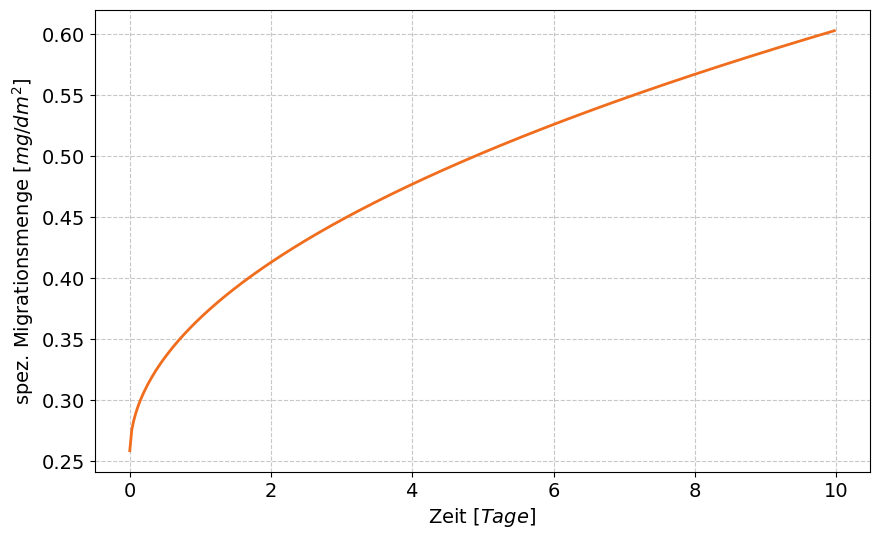

In [51]:
# Plotten der Ergebnisse
plot_results_area(results_area, t_max, dt, save_path=full_path)